In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [3]:
tickers = ["BEI.DE", "^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = "yahoo", start = "2010-1-1")["Adj Close"]

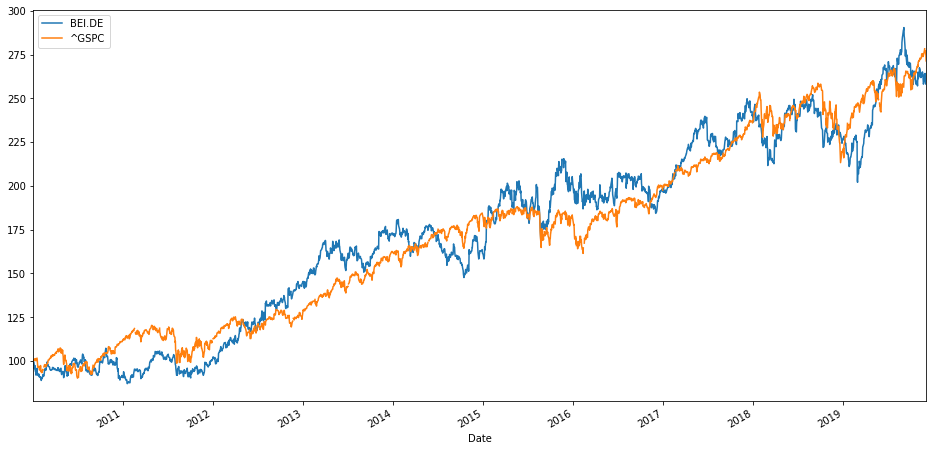

In [6]:
#data normilization 
(data/data.iloc[0]*100).plot(figsize = (16,8))
plt.show()

In [7]:
simpleReturns = (data/data.shift(1)) -1

In [9]:
simpleReturns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2010-01-04 to 2019-12-03
Data columns (total 2 columns):
BEI.DE    2519 non-null float64
^GSPC     2390 non-null float64
dtypes: float64(2)
memory usage: 59.1 KB


In [10]:
simpleReturns.cov() * 250

,BEI.DE,^GSPC
BEI.DE,0.034209,0.008766
^GSPC,0.008766,0.021988


In [11]:
simpleReturns.corr()

,BEI.DE,^GSPC
BEI.DE,1.000000,0.316202
^GSPC,0.316202,1.000000


In [13]:
port_security_count = len(tickers)

In [14]:
#BEI.DE and ^GSPC has a positive correlation but low and can benefit from a diversificaiton effect. 

Lets test the frontier theory to generate the mose efficient protfolio

In [22]:
#we will generate 1000 portfolios at different weights to test this theory
port_Expected_returns = []
port_Std = []

for x in range(1000):
    weights = np.random.random(port_security_count)
    weights /= np.sum(weights)
    port_Expected_returns.append(np.sum(weights * simpleReturns.mean()) * 250)
    port_Std.append(np.sqrt(np.dot(weights.T, np.dot(simpleReturns.cov() * 250, weights))))
#need to make the exp_returns and std numpy arrays 
expected_return_array = np.array(port_Expected_returns)
volatility_portfolio = np.array(port_Std)

In [23]:
#generate a new dataframe that will contain the returned returns and volatility

In [24]:
portfolios = pd.DataFrame({"Volatility": volatility_portfolio, "Returns": expected_return_array})

In [25]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Volatility    1000 non-null float64
Returns       1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


In [26]:
portfolios.head()

,Volatility,Returns
0,0.175115,0.112353
1,0.174138,0.112346
2,0.135755,0.111955
3,0.135738,0.111954
4,0.133005,0.111736


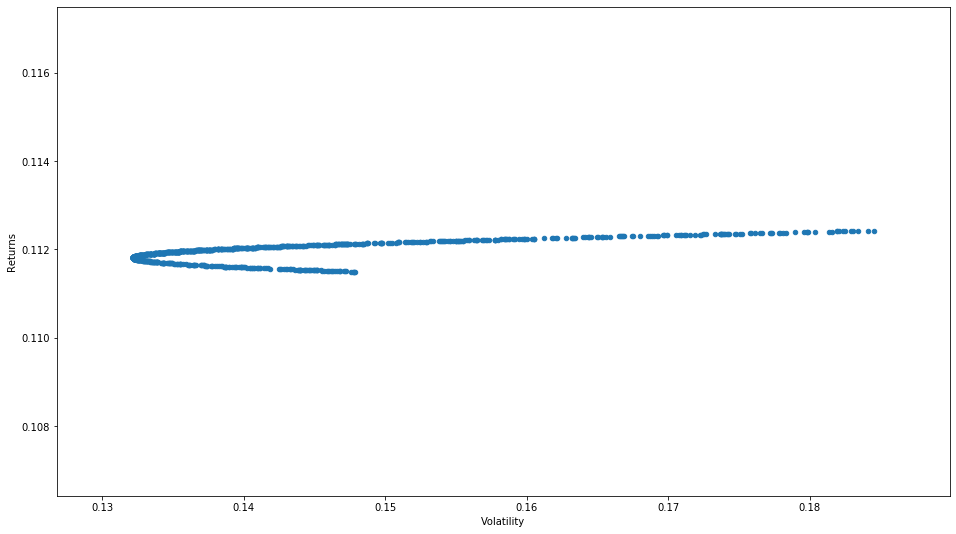

In [28]:
# we will plot this on a sctter plot to ceate the effieicnet frontier
portfolios.plot(x = "Volatility", y = "Returns", kind = "scatter", figsize=(16,9))